In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict


AXIS_SIZE = 32
LEGEND_SIZE = 32
# === Structured raw_data ===
node_accuracy = [
    ("MaxOrbitGCN",
     [2, 3, 4, 5, 6],
     [0.998, 0.917, 0.839, 0.712, 0.687],
     [0, 0.006, 0.008, 0.016, 0.014]),

    ("GCN",
     [2, 3, 4, 5, 6],
     [0.720, 0.592, 0.592, 0.447, 0.468],
     [0.005, 0.001, 0.004, 0.005, 0.004]),
]

orbit_accuracy = [
    ("MaxOrbitGCN",
     [2, 3, 4, 5, 6],
     [0.937, 0.874, 0.831,0.822, 0.802],
     [0.013, 0.013, 0.023, 0.023, 0.037]), 
    
    ("GCN",
     [2, 3, 4, 5, 6],
     [0.857, 0.779, 0.681, 0.650, 0.641],
     [0.001, 0.000, 0.001, 0.001, 0.002]),
]


In [9]:
def plot_func(raw_data):
    plot_data = defaultdict(dict)
    for model, alpha, best_valid, variance in raw_data:
        plot_data[model]["alpha"] = alpha
        plot_data[model]["best_valid"] = best_valid
        plot_data[model]["variance"] = variance

    baselines = ["GCN", "MaxOrbitGCN"]

    # === Color setup ===
    def is_yellow(rgb): return rgb[0] > 0.9 and rgb[1] > 0.9 and rgb[2] < 0.6
    palette = sns.color_palette("Set2", len(baselines) + 2)
    baseline_colors = [c for c in palette if not is_yellow(c)][:len(baselines)]
    model_colors = {m: c for m, c in zip(baselines, baseline_colors)}

    dashed_models = {"ChebGCN", "LINKX", "GIN"}
    line_styles = {m: "--" if m in dashed_models else "-" for m in plot_data}

    # === Plotting ===
    fig, ax = plt.subplots(figsize=(10, 8))

    for idx, (model, values) in enumerate(plot_data.items()):
        color = model_colors.get(model, f"C{idx}")
        alphas = values["alpha"]
        scores = values["best_valid"]
        variances = values["variance"]

        ax.plot(
            alphas, scores,
            linestyle=line_styles.get(model, "-"),
            linewidth=2.2, color=color,
            label=model, marker='o',
            markersize=5.5, markerfacecolor=color,
            markeredgecolor='black', markeredgewidth=0.6
        )

        lower_var = np.array(variances) * 0.8
        upper_var = np.array(variances) * 0.2

        ax.errorbar(
            alphas, scores, yerr=[lower_var, upper_var],
            fmt='o', color=color, alpha=0.25,
            capsize=4, elinewidth=1.4, capthick=1.4
        )


    # === Axis labels and ticks ===
    fontsize = AXIS_SIZE
    ax.set_xlabel(r"$\alpha$", fontsize=fontsize)
    ax.set_ylabel("ACC (/%)", fontsize=fontsize)

    # Ensure all unique alphas across models
    all_alphas = sorted(set(sum([v["alpha"] for v in plot_data.values()], [])))
    ax.set_xticks(all_alphas)
    ax.set_ylim(0.40, 1.02)
    ax.set_yticks(np.arange(0.40, 1.002, 0.12))
    ax.tick_params(axis='both', labelsize=fontsize)
    ax.legend(fontsize=LEGEND_SIZE, loc="lower left", frameon=False, ncol=1)

    plt.tight_layout()
    plt.show()

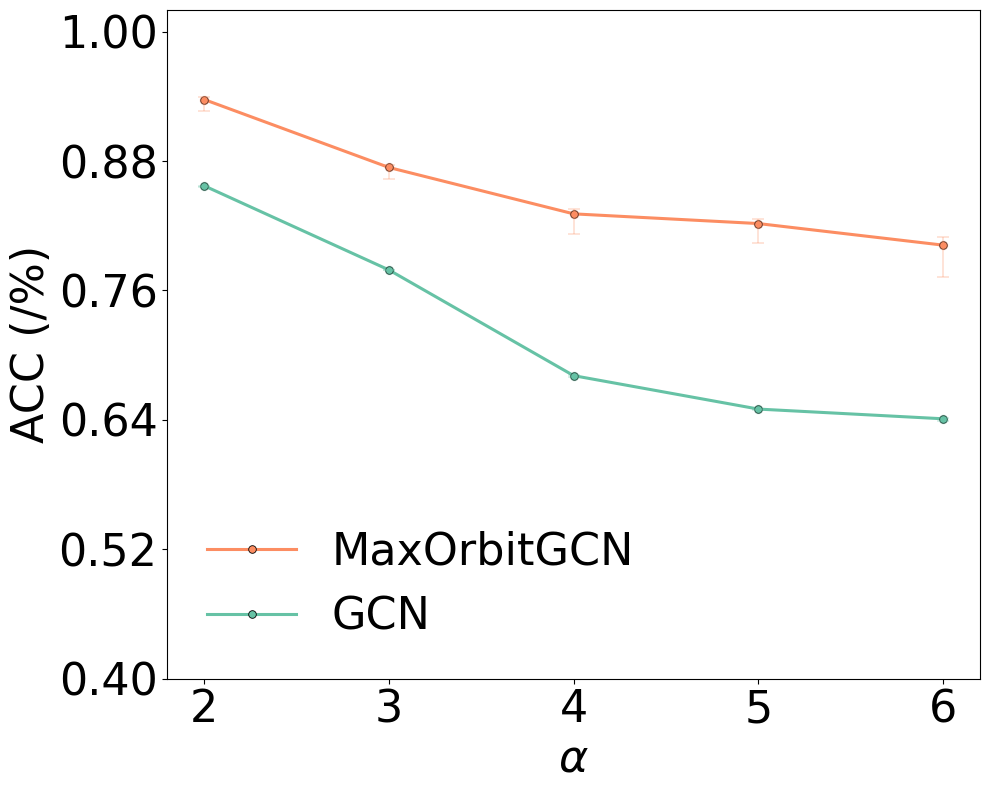

In [10]:
file_name = "Motivate_orbit_accuracy.pdf"
# === Prepare plot data ===
plot_func(orbit_accuracy)

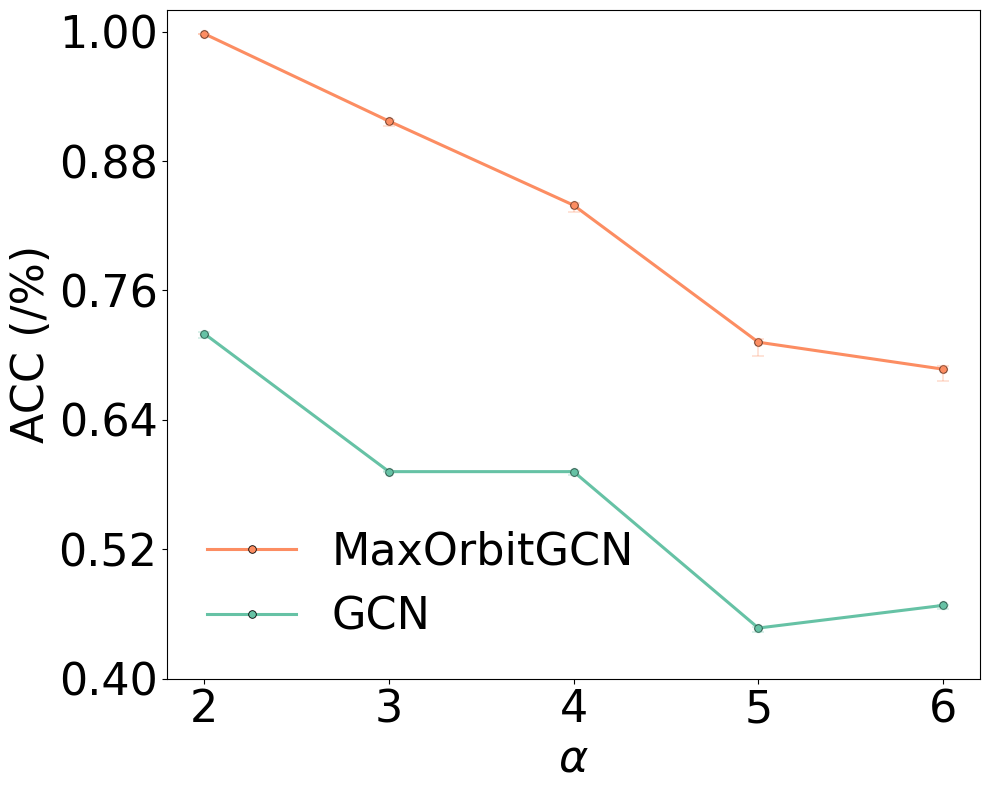

In [11]:
plot_func(node_accuracy)